# fNIRS data visualization

## Obtaining the raw data

In [1]:
import os
txtFolder = "fNIRS data"
txtFiles = os.listdir(txtFolder)
print(txtFiles)

    

['S01_AM.txt', 'S01_VM.txt', 'S02_AM.txt', 'S02_VM.txt', 'S03_AM.txt', 'S03_VM.txt']


In [10]:
File = 'S01_VM.txt'
fileName = os.path.join(txtFolder, File)
fp = open(fileName, "r")
xNum = 0
HbRNum = 0
HbONum = 0
HbRVal = []
HbOVal = []
for line in fp.readlines():
    yval = line.strip()
    if (yval.isnumeric()):
        yval = int(yval)
        if (xNum%2==0):
            HbONum+=1
            HbOVal.append(yval)
        else:
            HbRNum+=1
            HbRVal.append(yval)
        xNum+=1
print("HbOvalues",len(HbOVal))
print("HbRvalues",len(HbRVal))

HbOvalues 12000
HbRvalues 12000


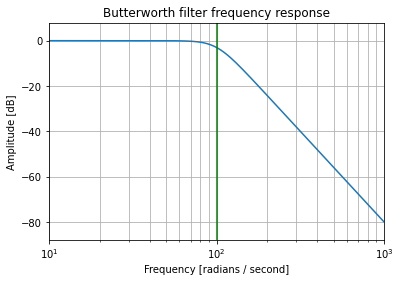

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
%matplotlib inline

b, a = signal.butter(4, 100, 'low', analog=True)
w, h = signal.freqs(b, a)
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green')  # cutoff frequency
plt.show()



In [11]:
#adding a low pass filter
sos = signal.butter(10, 5, 'lp', fs=1000, output='sos')

# fig = plt.figure()
# fig.set_size_inches(12, 5)

filteredO = signal.sosfilt(sos, HbOVal)
# plt.plot(HbOx, filteredO,label="Oxy-Heamoglobin Intensities")

filteredR = signal.sosfilt(sos, HbRVal)
# plt.plot(HbRx, filteredR,label="DeOxy-Heamoglobin Intensities")

In [68]:
import plotly.graph_objects as go
fig = go.Figure()

Tottime = 60
stepSize = 100
brainHeight = 8
brainWidth = 4
radius = 1

# Add images
fig.add_layout_image(
    dict(
        source="brain_top.png",
        xref="x",
        yref="y",
        x=0,
        y=brainHeight,
        sizex=brainWidth,
        sizey=brainHeight,
        sizing="stretch",
        opacity=0.5,
        layer="below")
)

# Set templates
fig.update_layout(template="plotly_white")

# Set axes properties
fig.update_xaxes(range=[0, brainWidth], zeroline=False)
fig.update_yaxes(range=[-0.5, brainHeight+0.5])

for step in np.arange(0, min(HbRNum, HbONum)-1, stepSize):
    r1 = float((HbRVal[step]-min(HbRVal))/(max(HbRVal)-min(HbRVal)))*radius
    fig.add_trace(
        go.Scatter(
            visible=False,
            line=dict(color="LightSkyBlue", width=6),
            x=[1, 1+r1],
            y=[6, 6+r1]))

# Make 10th trace visible
fig.data[0].visible = True

# Create and add slider
steps = []

for i in range(len(fig.data)):
    unitTime = float(Tottime/len(fig.data))
    step = dict(
        method="update",
        args=[{"visible": [False] * len(fig.data)},
              {"title": "Dexy Heamoglobin Levels - Time " + str(i*unitTime) + "s"}],  # layout attribute
    )
    step["args"][0]["visible"][i] = True  # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active=0,
    steps=steps
)]

fig.update_layout(
    sliders=sliders
)

fig.show()




In [67]:
import plotly.graph_objects as go
fig = go.Figure()

Tottime = 60
stepSize = 100
brainHeight = 8
brainWidth = 4
radius = 1

# Add images
fig.add_layout_image(
    dict(
        source="brain_top.png",
        xref="x",
        yref="y",
        x=0,
        y=brainHeight,
        sizex=brainWidth,
        sizey=brainHeight,
        sizing="stretch",
        opacity=0.5,
        layer="below")
)

# Set templates
fig.update_layout(template="plotly_white")

# Set axes properties
fig.update_xaxes(range=[0, brainWidth], zeroline=False)
fig.update_yaxes(range=[-0.5, brainHeight+0.5])

for step in np.arange(0, min(HbRNum, HbONum)-1, stepSize):
    r2 = float((HbOVal[step]-min(HbOVal))/(max(HbOVal)-min(HbOVal)))*radius
    fig.add_trace(
        go.Scatter(
            visible=False,
            line=dict(color="red", width=6),
            x=[1, 1+r2],
            y=[6, 6+r2]))

# Make 10th trace visible
fig.data[0].visible = True

# Create and add slider
steps = []

for i in range(len(fig.data)):
    unitTime = float(Tottime/len(fig.data))
    step = dict(
        method="update",
        args=[{"visible": [False] * len(fig.data)},
              {"title": "Oxy Heamoglobin Levels - Time " + str(i*unitTime) +"s"}],  # layout attribute
    )
    step["args"][0]["visible"][i] = True  # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active=0,
    steps=steps
)]

fig.update_layout(
    sliders=sliders
)

fig.show()
